# Hipparcos Kataloğu'ndaki  Yıldızların Analizi

# Hipparcos Kataloğu

ESA'nın Hipparcos uzay astrometrisi misyonu, yüksek hassasiyetle yüz binden fazla yıldızın ve daha az hassasiyetle bir milyondan fazla yıldızın konumlarını belirleyen öncü bir Avrupa projesiydi.

Ağustos 1989'da başlatılan Hipparcos, Mart 1993'te operasyonlar sona ermeden önce 3,5 yıl boyunca göksel küreyi başarıyla gözlemledi. Ana cihaz tarafından yapılan gözlemlerden yapılan hesaplamalar, en yüksek hassasiyetle çizilen 118.218 yıldızdan oluşan Hipparcos Kataloğu'nu oluşturdu.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from astropy import units as u
import seaborn as sns

In [3]:
hipparcos = pd.read_csv('hipparcos.csv')
df=pd.DataFrame(hipparcos)
df

,Catalog,HIP,Proxy,RAhms,DEdms,Vmag,VarFlag,r_Vmag,RAdeg,DEdeg,...,Survey,Chart,Notes,HD,BD,CoD,CPD,(V-I)red,SpType,r_SpType
0,H,1,,00 00 00.22,+01 05 20.4,9.10,0,H,0.000912,1.089013,...,S,,,224700,B+00 5077,,,0.66,F5,S
1,H,2,,00 00 00.91,-19 29 55.8,9.27,0,G,0.003797,-19.498837,...,,,,224690,B-20 6688,,,1.04,K3V,4
2,H,3,,00 00 01.20,+38 51 33.4,6.61,0,G,0.005008,38.859286,...,S,,,224699,B+38 5108,,,0.00,B9,S
3,H,4,,00 00 02.01,-51 53 36.8,8.06,0,H,0.008382,-51.893546,...,S,,,224707,,,P-52 12237,0.43,F0V,2
4,H,5,,00 00 02.39,-40 35 28.4,8.55,0,H,0.009965,-40.591224,...,,,,224705,,C-41 15372,P-41 9991,0.95,G8III,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118213,H,118318,,23 59 51.30,+11 40 25.4,6.99,1,H,359.963744,11.673709,...,S,,,224673,B+10 5018,,,1.56,K2,S
118214,H,118319,,23 59 53.74,-22 25 41.4,8.23,0,G,359.973913,-22.428180,...,S,,,224693,,C-23 18108,P-23 8366,0.70,G2V,4
118215,H,118320,,23 59 54.25,+05 57 23.9,7.59,0,H,359.976057,5.956638,...,S,,,224689,B+05 5245,,,0.98,K0,S
118216,H,118321,,23 59 54.78,-64 22 21.3,9.20,0,G,359.978239,-64.372572,...,,,,224685,,C-65 2958,P-65 4188,0.75,G5V,1


Burada elimizde toplam 118.218 satırdan ve 78 sütundan oluşan bir veriseti mevcut.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118218 entries, 0 to 118217
Data columns (total 78 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Catalog    118218 non-null  object 
 1   HIP        118218 non-null  int64  
 2   Proxy      118218 non-null  object 
 3   RAhms      118218 non-null  object 
 4   DEdms      118218 non-null  object 
 5   Vmag       118218 non-null  float64
 6   VarFlag    118218 non-null  int64  
 7   r_Vmag     118218 non-null  object 
 8   RAdeg      118218 non-null  float64
 9   DEdeg      118218 non-null  float64
 10  AstroRef   118218 non-null  object 
 11  Plx        118218 non-null  float64
 12  pmRA       118218 non-null  float64
 13  pmDE       118218 non-null  float64
 14  e_RAdeg    118218 non-null  float64
 15  e_DEdeg    118218 non-null  float64
 16  e_Plx      118218 non-null  float64
 17  e_pmRA     118218 non-null  float64
 18  e_pmDE     118218 non-null  float64
 19  DE:RA      118218 non-n

Bu veriseti içerisindeki başlıkları görmek istedim

In [5]:
columns_of_interest = ['Vmag', 'Plx','e_Plx', 'pmRA:RA', 'pmDE:DE', 'B-V', 'V-I', 'SpType']
hip_df = df[columns_of_interest]
hip_df

,Vmag,Plx,e_Plx,pmRA:RA,pmDE:DE,B-V,V-I,SpType
0,9.10,3.54,1.39,-0.24,-0.01,0.482,0.55,F5
1,9.27,21.90,3.10,-0.29,-0.19,0.999,1.04,K3V
2,6.61,2.81,0.63,0.43,0.24,-0.019,0.00,B9
3,8.06,7.75,0.97,0.24,0.08,0.370,0.43,F0V
4,8.55,2.87,1.11,0.26,-0.30,0.902,0.90,G8III
...,...,...,...,...,...,...,...,...
118213,6.99,1.92,0.91,-0.19,-0.11,1.595,1.61,K2
118214,8.23,10.63,1.17,-0.11,-0.31,0.639,0.70,G2V
118215,7.59,5.00,1.01,-0.18,-0.14,0.999,0.98,K0
118216,9.20,19.22,1.00,-0.03,0.01,0.698,0.75,G5V


Sadece ihtiyacım olan, astronomi alanında birbiri ile bağdaştırabilip anlamlı görseller oluşturabileceğim başlıklar seçtim.


* Vmag (V Magnitude):

Görsel parlaklık büyüklüğüdür. Bir yıldızın Dünya'dan gözlemlenen parlaklığını ifade eder. Büyüklük skalasında, daha küçük bir sayı daha parlak bir yıldızı ifade eder.

* Plx (Parallax):

Paralaks açısıdır ve yıldızın Dünya'dan uzaklığını ölçmek için kullanılır. Paralaks açısı, yıldızın konumundaki görünür değişikliktir ve genellikle milisaniye (mas) cinsinden ölçülür. Uzaklık hesaplamak için kullanılır: d (parsec) = 1 / p (arcsecond).

* e_Plx (Error in Parallax):

Paralaks ölçümünün hata payıdır. Ölçümdeki belirsizliği ifade eder ve yine milisaniye cinsinden verilir.

* pmRA:RA (Proper Motion in Right Ascension):

Sağ açıklık (RA) yönündeki öz hareket miktarıdır. Yıldızın gökyüzünde yıllık olarak yaptığı hareketi belirtir ve genellikle milisaniye/yıl cinsinden ölçülür.

* pmDE:DE (Proper Motion in Declination):

Dik açıklık (DEC) yönündeki öz hareket miktarıdır. Bu da yıldızın gökyüzünde yıllık olarak yaptığı hareketi belirtir ve milisaniye/yıl cinsinden ölçülür.


* B-V (B-V Color Index):

B ve V filtreleri arasındaki renk indeksidir. B (mavi) ve V (görsel) bantlarındaki parlaklık farkını ifade eder. Bir yıldızın yüzey sıcaklığını ve rengini belirlemede kullanılır. Pozitif bir değer daha kırmızı bir yıldızı, negatif bir değer ise daha mavi bir yıldızı gösterir.

* V-I (V-I Color Index):

V (görsel) ve I (yakın kızılötesi) filtreleri arasındaki renk indeksidir. Yıldızın yüzey sıcaklığı ve rengini belirlemede kullanılır. B-V gibi, pozitif bir değer daha kırmızı bir yıldızı, negatif bir değer ise daha mavi bir yıldızı gösterir.

* SpType (Spectral Type):

Yıldızın spektral tipini ifade eder. Yıldızın yüzey sıcaklığına ve spektrumuna dayalı olarak sınıflandırılır. Ana sınıflar O, B, A, F, G, K, ve M'dir. Örneğin, G2V, G sınıfında, ana dizide (anakol) yer alan bir yıldızı ifade eder. Bu sınıflandırma, yıldızların fiziksel özelliklerini ve evrimsel durumlarını anlamada kullanılır.


In [6]:
hip_df.replace(0, float("NaN"), inplace=True)
hip_df.dropna(subset=['B-V'], inplace=True)
#hata = hip_df['e_Plx']*3

hip_df = hip_df[hip_df['Plx'] > 0]
hip_df = hip_df[hip_df['Plx'].abs() >= hip_df['e_Plx']*3]

<ipython-input-6-26fb93101cc0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hip_df.replace(0, float("NaN"), inplace=True)
<ipython-input-6-26fb93101cc0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hip_df.dropna(subset=['B-V'], inplace=True)


Veri Temizleme İşlemleri:

* 0 Değerlerinin NaN ile Değiştirilmesi:

Birinci adımda, veri setindeki 0 değerleri NaN (Not a Number) değerleriyle değiştirilmiştir. Bu işlem, veri setindeki boş veya geçersiz değerlerin ele alınmasını sağlar.

* NaN Değerlerin Temizlenmesi:

İkinci adımda NaN değerler içeren satırlar, 'B-V' sütununda bulundukları için bu sütunda NaN değeri içeren satırların silinmesi sağlanmıştır. Bu adım, analiz için temiz bir veri seti elde etmek amacıyla uygulanmıştır.
Veri Filtreleme İşlemleri:

* Paralaks Hatası Kriterine Göre Veri Filtreleme:

Son iki adımda ise, paralaks ölçüm hatası kriterine dayalı olarak veri seti filtrelenmiştir. Paralaks : Trigonometrik paralaks, yıldızdan yer yörüngesinin yarıçapını gören açı olarak tanımlandığından ancak çok yakın yıldızlar için tayin edilebilir. Bu yüzden ilk satırda, paralaks değeri 0'dan büyük olan gözlemler alınmıştır. İkinci satırda ise, paralaks değerinin mutlak değeri, hata değerinin üç katından büyük veya eşit olan gözlemler alınmıştır. Bu filtreleme işlemleri, veri setindeki güvenilir ve geçerli gözlemlerin seçilmesini sağlar.


In [7]:
hip_df

,Vmag,Plx,e_Plx,pmRA:RA,pmDE:DE,B-V,V-I,SpType
1,9.27,21.90,3.10,-0.29,-0.19,0.999,1.04,K3V
2,6.61,2.81,0.63,0.43,0.24,-0.019,NaN,B9
3,8.06,7.75,0.97,0.24,0.08,0.370,0.43,F0V
5,12.31,18.80,4.99,-0.11,0.03,1.336,1.55,M0V:
6,9.64,17.74,1.30,-0.04,NaN,0.740,0.79,G0
...,...,...,...,...,...,...,...,...
118207,11.85,24.63,2.96,-0.49,-0.44,1.391,1.65,
118214,8.23,10.63,1.17,-0.11,-0.31,0.639,0.70,G2V
118215,7.59,5.00,1.01,-0.18,-0.14,0.999,0.98,K0
118216,9.20,19.22,1.00,-0.03,0.01,0.698,0.75,G5V


Bu işlemi yaptıktan sonra veriseti 73.929 satır ve 8 sütuna düşmüştür.

In [8]:
hip_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Vmag,73929.0,8.052723,1.323064,-1.44,7.300,8.130,8.88,13.11
Plx,73929.0,10.124597,12.995785,1.37,4.620,6.880,11.23,772.33
e_Plx,73929.0,1.119228,0.700964,0.38,0.810,1.000,1.25,69.07
pmRA:RA,72455.0,0.009360,0.208878,-0.99,-0.130,0.020,0.15,0.88
pmDE:DE,72678.0,-0.017983,0.260273,-0.97,-0.190,-0.030,0.14,0.94
B-V,73929.0,0.652427,0.428028,-0.40,0.367,0.574,0.99,3.44
V-I,73597.0,0.707265,0.478923,-0.37,0.430,0.650,0.98,9.03


hip_df.describe() : Bir veri çerçevesinin istatistiksel özetini oluşturur. Bu özet, veri çerçevesindeki sayısal sütunlar için temel istatistik değerlerini içerir: count (sayı), mean (ortalama), std (standart sapma), min (minimum), 25% (ilk çeyrek), 50% (medyan), 75% (üçüncü çeyrek) ve max (maksimum).

In [9]:
hip_df.isnull().sum()

Vmag          0
Plx           0
e_Plx         0
pmRA:RA    1474
pmDE:DE    1251
B-V           0
V-I         332
SpType        0
dtype: int64

Hangi sütunlarda ne kadar boş değer var diye kontrol ettim.


In [56]:
vı = hip_df['V-I']
bv = hip_df['B-V']
vmag = hip_df['Vmag']
plx = hip_df['Plx']

In [11]:
d=1000/plx  # uzaklık
uz_mod = 5*np.log10(d)-5 #uzaklık modülü
M = vmag-uz_mod # mutlak parlaklık

Burada veri setinde olmayan ama işime yarayacak ve hesaplanabilir olan parametreleri formül ile kendim elde ettim.  Veri setindeki paralaks değerlerinden yola çıkarak uzaklık ve uzaklık modülü hesaplamalarını gerçekleştiriyor:

* Uzaklık Hesaplama:

d = 1000 / plx: Bu satırda, paralaks değerlerinin tersi alınarak uzaklık hesaplanmıştır. Paralaks, bir yıldızın gökyüzündeki göreceli konumundaki değişimi ifade eder ve bu değişim, yıldızın uzaklığı ile doğrudan ilişkilidir. Paralaksın parsek cinsinden değeri alındığı için, d değişkeni de parsek cinsinden uzaklık değerlerini içerir. Uzaklık arttıkça paralaks değeri küçülür

* Uzaklık Modülü Hesaplama:

uz_mod = 5 * np.log10(d) - 5: Bu satırda, hesaplanan uzaklık değerleri kullanılarak uzaklık modülü hesaplanmıştır. Uzaklık modülü, bir yıldızın görünür parlaklığı ile mutlak parlaklığı arasındaki ilişkiyi ifade eder. Burada, logaritmik bir ölçekte uzaklık değerleri kullanılarak uzaklık modülü hesaplanmıştır. np.log10() fonksiyonu numpy kütüphanesinden gelir ve logaritmayı 10 tabanında alır.

* Mutlak Parlaklık Hesaplama:

M = vmag - uz_mod: Bu satırda, görünür parlaklık (vmag) değerinden uzaklık modülü (uz_mod) çıkarılarak mutlak parlaklık (M) değerleri hesaplanmıştır. Mutlak parlaklık, bir yıldızın görünür parlaklığına uzaklık modülünün eklenmesiyle bulunur. Bu, yıldızın parlaklığının, gözlemcinin pozisyonundan bağımsız olarak gerçek parlaklığını temsil eder.

# HR Diyagramı

1911 yılında Danimarkalı astronom Ejnar Hertzsprung ve 1913’te Amerikalı astronom Henry Russell birbirlerinden bağımsız olarak yıldızların parlaklıkları ve sıcaklıkları arasında bir ilişki olduğunu tespit etti. Bu iki bilim insanının keşiflerinden dolayı Hertzsprung-Russell diyagramı olarak adlandırılan HR diyagramı aslında yıldızları ayırt etmek ve yıldızların hangi evrim basamağında olduğunu saptamak için kullanılan görsel bir araç haline geldi.

 Bu sistem,yıldızların sıcaklığını parlaklıklarına veya yıldızların rengini, mutlak büyüklüklerine karşı çizer. Her yıldız, başlangıç kütlesine bağlı olarak, iç yapısının ve nasıl enerji ürettiğinin belirlediği belirli evrim aşamalarından geçer.
 
 Bu aşamaların her biri, geliştikçe HR diyagramında farklı bölgelere hareket ettiği görülebilen yıldızın sıcaklığındaki ve parlaklığında bir değişikliğe karşılık gelir. Bu, HR diyagramının gerçek gücünü ortaya çıkarır. Gökbilimciler, bir yıldızın iç yapısını ve evrimsel aşamasını, yalnızca diyagramdaki konumunu belirleyerek bilebilirler.

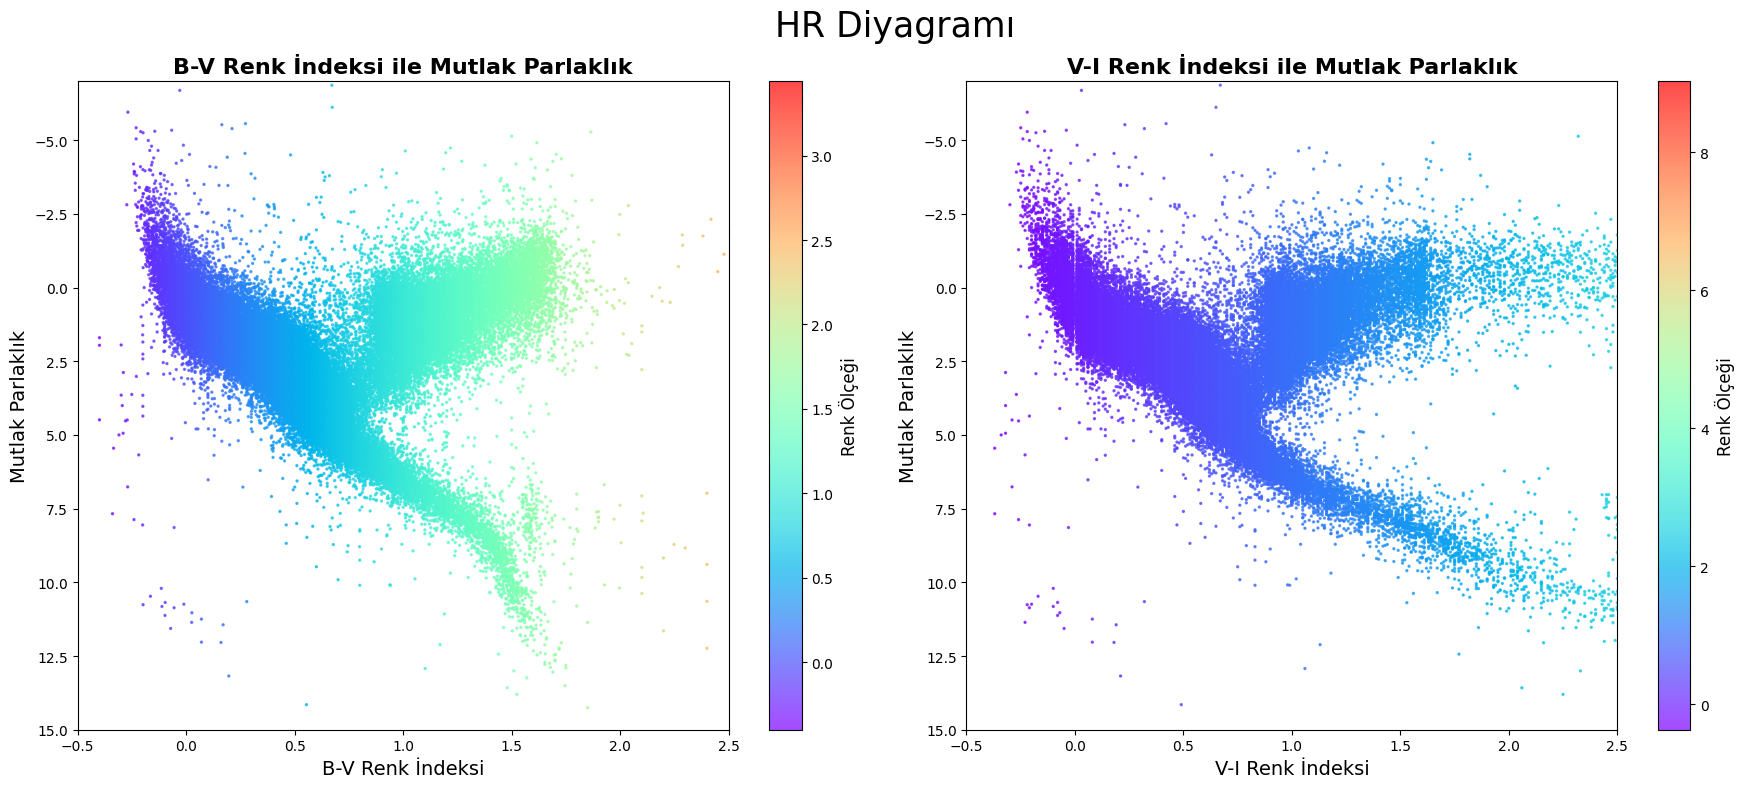

In [65]:
plt.figure(figsize=(18, 8), dpi=100) 

plt.subplot(1, 2, 1)
plt.scatter(bv, M, s=2, alpha=0.7, c=bv, cmap="rainbow") 
plt.xlim(-0.5, 2.5)
plt.ylim(15, -7)  
plt.xlabel('B-V Renk İndeksi', fontsize=14) 
plt.ylabel('Mutlak Parlaklık', fontsize=14) 
plt.title('B-V Renk İndeksi ile Mutlak Parlaklık', fontsize=16) 
cbar1 = plt.colorbar() 
cbar1.set_label('Renk Ölçeği', fontsize=12) 

plt.subplot(1, 2, 2)
plt.scatter(vı, M, s=2, alpha=0.7, c=vı, cmap="rainbow") 
plt.xlim(-0.5, 2.5)
plt.ylim(15, -7) 
plt.xlabel('V-I Renk İndeksi', fontsize=14)
plt.ylabel('Mutlak Parlaklık', fontsize=14)
plt.title('V-I Renk İndeksi ile Mutlak Parlaklık', fontsize=16) 
cbar2 = plt.colorbar() 
cbar2.set_label('Renk Ölçeği', fontsize=12) 

plt.suptitle('HR Diyagramı', fontsize=25) 
plt.tight_layout() 
plt.show()


Bu iki grafik arasında farkın sebebi 2 ayrı renk filtresinden oluşmasıdır. Yani ;

* B-V Renk İndeksi: 

B-V renk indeksi, yıldızların mavi (B) ve görünür (V) dalga boylarındaki ışık farkını ifade eder. Bu renk indeksi, yıldızların sıcaklığına ve yüzey özelliklerine bağlı olarak değişir. Daha büyük bir B-V değeri, yıldızın daha kırmızı olduğunu gösterirken, daha küçük bir değer daha mavi bir yıldızı işaret eder.

* V-I Renk İndeksi:

V-I renk indeksi aslında bir yıldızın kızılötesi(I) ve görünür (V) ışık arasındaki farkı ifade eder. Bu nedenle, daha büyük bir "V-I" değeri, yıldızın daha kırmızı olduğunu gösterirken, daha küçük bir değer daha mavi bir yıldızı işaret eder.

In [67]:
bv2 = bv.to_numpy(list)

t_eff=[] #etkin sıcaklık değeri hesaplaması
a=0
for a in range(len(bv2)):
    b=4600*((1/(0.92*bv2[a]+1.7))+(1/(0.92*bv2[a]+0.62)))
    t_eff.append(b)
    a+=1

#print(t_eff)

Burada yine ekstra formül ile sıcaklık değerini hesapladım. Aşağıdaki görselde x ekseninde kullanabilmek için.

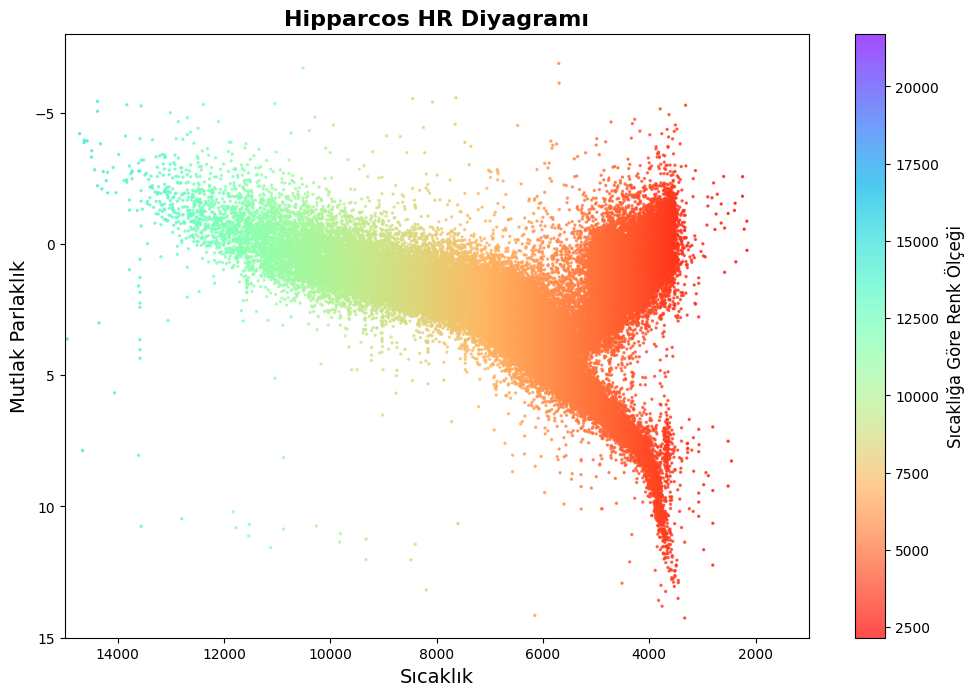

In [14]:
plt.figure(figsize=(12, 8), dpi=100) 
plt.scatter(t_eff, M, s=2, alpha=0.7, c=t_eff, cmap="rainbow_r") 
plt.xlim(15000, 1000) 
plt.ylim(15, -8) 
plt.xlabel('Sıcaklık', fontsize=14)
plt.ylabel('Mutlak Parlaklık', fontsize=14)
plt.title('Hipparcos HR Diyagramı', fontsize=16)
cbar = plt.colorbar() 
cbar.set_label('Sıcaklığa Göre Renk Ölçeği', fontsize=12) 
plt.show()


Burada sıcaklığa karşı mutlak parlaklık çizdirilmiştir. Yıldızların sola doğru daha sıcak olmaya başladığı görülmektedir. Mutlak parlaklık 0-5 arasında daha yoğun görünmektedir.

In [79]:
Mv=M.to_numpy(list) 
L_Lg=[] # Güneş cinsinden yıldızların ışınım gücü
c=0
for c in range(len(Mv)):
    L_Lg.append(100**((4.82-Mv[c])/5))
    c+=1

#print(L_Lg)

Burada, bir yıldızın mutlak parlaklığından (Mv) yola çıkarak yıldızın ışınım gücü Güneş cinsinden (L/L☉) hesaplanmıştır.

In [16]:
R_Rg=[] # Güneş cinsinden yıldızların yarıçapı
e=0
for e in range(len(L_Lg)):
    R_Rg.append(np.square(5770/t_eff[e])*np.sqrt(L_Lg[e]))
    e+=1

#print(R_Rg)

Bi önceki hesaplama buarada işime yarayacğından dolayı yapılmışıtr. Burada ise formül sayesinde Güneş cinsinden yıldızların yarıçap hesapları yapılmıştır (R/R☉).

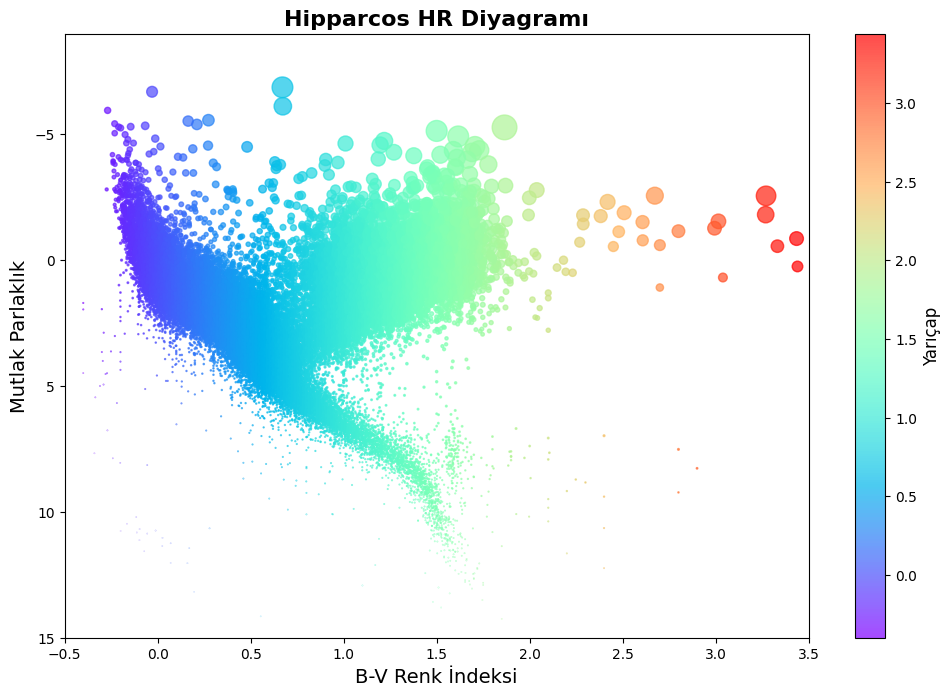

In [17]:
plt.figure(figsize=(12, 8), dpi=100)
plt.scatter(bv, M, s=R_Rg, alpha=0.7, c=bv, cmap="rainbow") 
plt.xlim(-0.5, 3.5) 
plt.ylim(15, -9) 
plt.xlabel('B-V Renk İndeksi', fontsize=14) 
plt.ylabel('Mutlak Parlaklık', fontsize=14) 
plt.title('Hipparcos HR Diyagramı', fontsize=16) 
cbar = plt.colorbar() 
cbar.set_label('Yarıçap', fontsize=12) 
plt.show()


Buradaki görselde B-V renk indeksine karşılık mutlak parlaklık çizdirilmiştir. Renklendirme ve noktaların boyutlandırılması ise yıldızların yarıçapına göre olmuştur. Sağdan sola gittikçe yıldızların yarıçaplarında bir düşüş gözlemliyoruz bu da yıldızın evrimi hakkında bilgi veriyor.

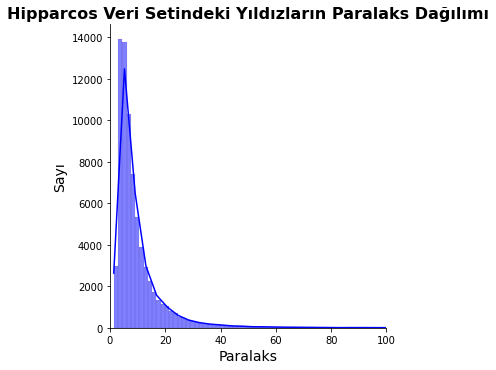

In [72]:
sns.displot(plx, bins=500, kde=True, color='blue')
plt.xlabel('Paralaks', fontsize=14) 
plt.xlim(0,100)
plt.ylabel('Sayı', fontsize=14) 
plt.title('Hipparcos Veri Setindeki Yıldızların Paralaks Dağılımı', fontsize=16) 
plt.show()


Grafiğin sol tarafında, yani küçük paralaks değerlerinde çok sayıda yıldız bulunuyor. Bu, çoğu yıldızın Dünya'dan oldukça uzakta olduğunu gösterir. Küçük paralaks değerleri, büyük mesafelere işaret eder. 
Paralaks değeri arttıkça yıldız sayısı hızla azalıyor. Bu, yakın çevremizde (Dünya'ya yakın olan yıldızlar) daha az sayıda yıldız bulunduğunu gösterir. Yakın yıldızlar daha büyük paralaks açılarına sahiptir.

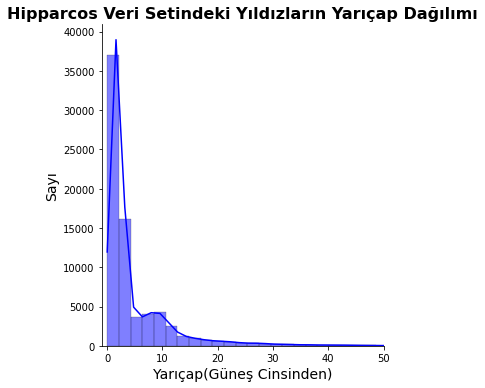

In [23]:
sns.displot(R_Rg, bins=150, kde=True, color='blue')
plt.xlabel('Yarıçap(Güneş Cinsinden)', fontsize=14) 
plt.xlim(-1,50)
plt.ylabel('Sayı', fontsize=14) 
plt.title('Hipparcos Veri Setindeki Yıldızların Yarıçap Dağılımı', fontsize=16) # Başlığı ayarla
plt.show()

Burada yarıçap yoğunluğu 0-3 Güneş yarıçapı cinsinden  daha çok gözükmektedir. Yani veri setindeki yıldızlar Güneş'in yarıçapını 1 kabul edersek çoğunlukla, Güneş'e çok yakın veya 3 katı gibi bir aralıkta yoğunluk göstermekte.

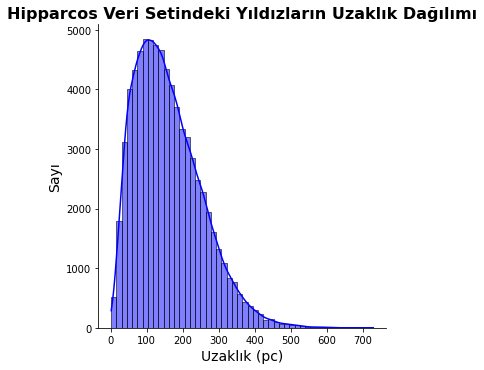

In [73]:
sns.displot(d, bins=50, kde=True, color='blue')
plt.xlabel('Uzaklık (pc)', fontsize=14) 
plt.ylabel('Sayı', fontsize=14)
plt.title('Hipparcos Veri Setindeki Yıldızların Uzaklık Dağılımı', fontsize=16) 
plt.show()


Burada yıldızların uzaklık dağılım grafiği çizdirilmiştir. Bu bize yoğunluğun tahmini olarak 50 - 200 parsec arasında olduğunu gösteriyor. 

Parsek (pc), gökbilimde kullanılan uzaklık ölçü birimidir. Paralaksı 1 olan bir gökcisminin uzaklığına denktir.
1 Parsek, yaklaşık 3,26 ışık yılına eşdeğerdir.

# Samanyolu Galaksisi

Samanyolu Galaksisi, Güneş’ in de içinde yer aldığı, dev yıldızlar sistemine verilen addır. Spiral bir yapıya sahip olmasıyla beraber basık bir özelliği vardır.

Bu galakside 100 milyar kadar  yıldızın var olduğu saptanmıştır. Bu yıldızlar bir disk şeklinde yayılmışlardır. Samanyolu Galaksisi’nde bulunan en parlak yıldızlarının bir çoğunun yer aldığı karakteristik özelliğe sahip spiral kollar, merkezi disk düzlemine oldukça yakındırlar.

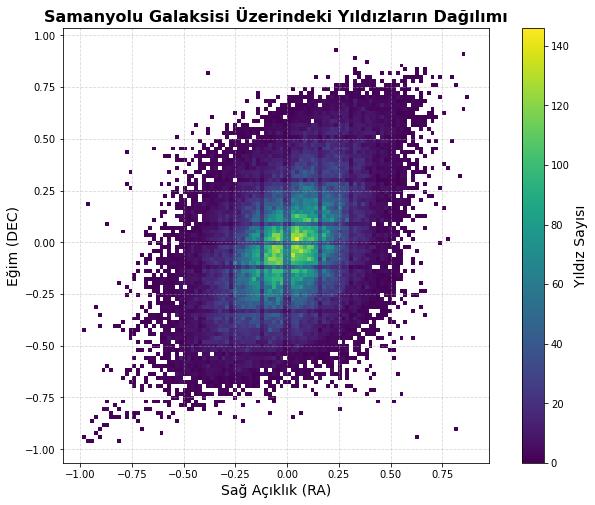

In [20]:
RA = hip_df['pmRA:RA']
DEC = hip_df['pmDE:DE']


# 2D histogram oluşturma
plt.figure(figsize=(12, 8))
h = sns.histplot(x=RA, y=DEC, bins=100, cmap='viridis')

plt.xlabel('Sağ Açıklık (RA)')
plt.ylabel('Eğim (DEC)')
plt.title('Samanyolu Galaksisi Üzerindeki Yıldızların Dağılımı')
plt.gca().set_aspect('equal', adjustable='box')
plt.grid(True, linestyle='--', alpha=0.5)


cbar = plt.colorbar(h.collections[0], ax=plt.gca())
cbar.set_label('Yıldız Sayısı')

plt.show()


Bu grafikte veri setinde verilen Samanyolu Galaksisi üzerindeki yıldızların sağ açıklık (RA) ve eğim (DEC) koordinatlarına göre dağılımını göstermektedir. Histogramın renk skalası, belirli RA ve DEC değerlerinde kaç tane yıldız olduğunu gösterir; daha yoğun yıldız bölgeleri daha parlak renkle gösterilmiştir.


Yıldızların yoğun bir şekilde bulunduğu merkezi bölgeler, galaksi düzlemine yakın alanları temsil ederken, daha düşük yoğunluklu dış bölgeler galaksinin daha seyrek yıldız popülasyonlarına sahip bölgelerini gösterir.


In [54]:
hip_df['SpType'].value_counts()

SpType
K0              4742
G5              4055
F8              3196
G0              3194
F5              2918
                ... 
B6                 1
A9IVm              1
A8Ib               1
A1III/IVm..        1
A:w...             1
Name: count, Length: 2631, dtype: int64

Burada SpType'da değerlerden kaç tane var diye baktım. Tayf değerlerinde 7 ana başlık vardır. Bunlar O B A F G K M şeklindedir. Alt başlıklarında ise; bu harflerin yanına bazı rakamlar gelebilir. Bunları 7 ana başlığa düşürmek için aşağıdaki kod parçaasını kullandım. 

In [22]:
hip_df['SpTypeClass'] = hip_df['SpType'].str.upper().str[0]

# Geçersiz değerleri (O, B, A, F, G, K, M dışında olanları) NaN olarak işaretle
valid_types = ['O', 'B', 'A', 'F', 'G', 'K', 'M']
hip_df['SpTypeClass'] = hip_df['SpTypeClass'].where(hip_df['SpTypeClass'].isin(valid_types))
hip_df


,Vmag,Plx,e_Plx,pmRA:RA,pmDE:DE,B-V,V-I,SpType,SpTypeClass
1,9.27,21.90,3.10,-0.29,-0.19,0.999,1.04,K3V,K
2,6.61,2.81,0.63,0.43,0.24,-0.019,NaN,B9,B
3,8.06,7.75,0.97,0.24,0.08,0.370,0.43,F0V,F
5,12.31,18.80,4.99,-0.11,0.03,1.336,1.55,M0V:,M
6,9.64,17.74,1.30,-0.04,NaN,0.740,0.79,G0,G
...,...,...,...,...,...,...,...,...,...
118207,11.85,24.63,2.96,-0.49,-0.44,1.391,1.65,,NaN
118214,8.23,10.63,1.17,-0.11,-0.31,0.639,0.70,G2V,G
118215,7.59,5.00,1.01,-0.18,-0.14,0.999,0.98,K0,K
118216,9.20,19.22,1.00,-0.03,0.01,0.698,0.75,G5V,G


7 ana başlığa düşürdükten sonra bunu ekstra sütun olarak verisetinin içine ekledim.

In [27]:
hip_df['SpTypeClass'].value_counts()

SpTypeClass
F    19891
K    17536
G    16502
A    12415
B     4191
M     2094
O       21
Name: count, dtype: int64

* O Tipi: En sıcak ve en parlak yıldızlar. Mavi renkte görünürler ve yüzey sıcaklıkları yaklaşık 30,000 K veya daha yüksektir.
* B Tipi: Çok sıcak ve parlak yıldızlar. Mavi-beyaz renkte görünürler ve yüzey sıcaklıkları 10,000 - 30,000 K arasındadır.
* A Tipi: Sıcak yıldızlar. Beyaz renkte görünürler ve yüzey sıcaklıkları 7,500 - 10,000 K arasındadır.
* F Tipi: Orta sıcaklıkta yıldızlar. Sarı-beyaz renkte görünürler ve yüzey sıcaklıkları 6,000 - 7,500 K arasındadır.
* G Tipi: Güneş benzeri yıldızlar. Sarı renkte görünürler ve yüzey sıcaklıkları 5,200 - 6,000 K arasındadır.
* K Tipi: Orta sıcaklıkta, soğuk yıldızlar. Turuncu renkte görünürler ve yüzey sıcaklıkları 3,700 - 5,200 K arasındadır.
* M Tipi: En soğuk ve en kırmızı yıldızlar. Kırmızı renkte görünürler ve yüzey sıcaklıkları 2,400 - 3,700 K arasındadır.

Hangi başlıktan kaçar tane olduğuna baktım 

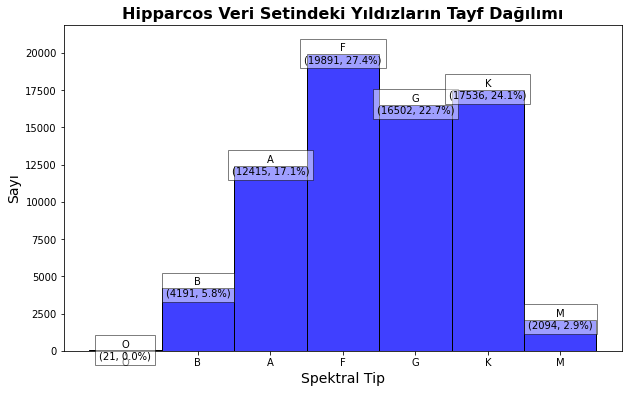

In [50]:
plt.figure(figsize=(10, 6))
sns.histplot(data=hip_df, x='SpTypeClass', bins=len(valid_types), color='blue')

type_counts = hip_df['SpTypeClass'].value_counts().reindex(valid_types, fill_value=0) # Her bir spektral tip için sayıları hesaplıyoruz

# Grafik üzerine her bir spektral tip için sayıları ve yüzdesini yazdırıyoruz
total_count = type_counts.sum()
for i, (type_label, count) in enumerate(type_counts.items()):
    percentage = count / total_count * 100
    plt.text(i, count + 50, f'{type_label}\n({count}, {percentage:.1f}%)',
             ha='center', va='center', fontsize=10, bbox=dict(facecolor='white', alpha=0.5))

plt.xlabel('Spektral Tip', fontsize=14) 
plt.ylabel('Sayı', fontsize=14) 
plt.ylim(0, max(type_counts) + 2000)
plt.title('Hipparcos Veri Setindeki Yıldızların Tayf Dağılımı', fontsize=16) 
plt.show()

Veri seti içerisindeki Spektral tipin dağılımna baktım. En az O ve M spektral tipine sahip yıldızlar ve en çok F tipindeki yıldızlar bulunuyor.